1. Implement the Edmond-Karp algorithm.

In [15]:
#class is also from given code
class Graph:
    def __init__(self, graph):
        self.graph = graph
        self.row = len(graph)
        
    # this code is from the given fulkerson code, kept this the same
    def BFS(self, s, t, parent):

            # Mark all the vertices as not visited
            visited = [False] * (self.row)

            # Create a queue for BFS
            queue = []

            # Mark the source node as visited and enqueue it
            queue.append(s)
            visited[s] = True

            # Standard BFS Loop
            while queue:
                # Dequeue a vertex from queue and print it
                u = queue.pop(0)

                # Get all adjacent vertices of the dequeued vertex u. If a adjacent has not 
                # been visited, then mark it visited and enqueue it
                for ind, val in enumerate(self.graph[u]):
                    if visited[ind] == False and val > 0:
                        # If we find a connection to the sink node,
                        # then there is no point in BFS anymore
                        # We just have to set its parent and can return true
                        queue.append(ind)
                        visited[ind] = True
                        parent[ind] = u
                        if ind == t:
                            return True

            # We didn't reach sink in BFS starting from source; return false
            return False
        
    #added the DFS code, very similer to BFS except with no enqueue/dequeue and recursively calls itself    
    def DFS(self, s, t, parent, visited):
        
        visited[s] = True                    #first/source node is visited
        
        #very similar to the BFS function except there is no enqueing or dequeing, and recursivly call the DFS function
        for ind, val in enumerate(self.graph[s]): #get all adjacent vertices of the first/current
            if visited[ind] == False and val > 0: #if neighbor is not visited
                parent[ind] = s                   #set to parent
                if ind == t:
                    return True
                if self.DFS(ind, t, parent, visited):          #calls the DFS fucntions again
                    return True
        
        return False
    
    
    
    
    # Returns the maximum flow from s to t in the given graph

    #code given
    def Ford_Fulkerson(self, source, sink):
            self.graph = graph # residual graph
            self.row = len(graph)
            # This array is filled by BFS and to store path
            parent = [-1] * (self.row)

            max_flow = 0 # There is no flow initially
            
            visited = [False] * (self.row)              #define visited because it is called in the DFS function

            # Augment the flow while there is path from source to sink
            while self.DFS(source, sink, parent, visited) :                  #added visited in the parameter

                # Find minimum residual capacity of the edges along the path filled by BFS. 
                # Or we can say find the maximum flow through the path found.
                path_flow = float("Inf")
                s = sink
                while(s != source):
                    path_flow = min (path_flow, self.graph[parent[s]][s])
                    s = parent[s]

                # Add path flow to overall flow
                max_flow += path_flow

                # update residual capacities of the edges and reverse edges along the path
                v = sink
                while(v != source):
                    u = parent[v]
                    self.graph[u][v] -= path_flow
                    self.graph[v][u] += path_flow
                    v = parent[v]

            return max_flow



    #code for edmond_karp, the code was already given, nothing changed in here
    def edmond_karp(self, source, sink):
        
        self.graph = graph # residual graph
        self.row = len(graph)
        # This array is filled by BFS and to store path
        parent = [-1] * (self.row)

        max_flow = 0 # There is no flow initially

        # Augment the flow while there is path from source to sink
        while self.BFS(source, sink, parent) :

            # Find minimum residual capacity of the edges along the path filled by BFS. 
            # Or we can say find the maximum flow through the path found.
            path_flow = float("Inf")
            s = sink
            while(s != source):
                path_flow = min (path_flow, self.graph[parent[s]][s])
                s = parent[s]

            # Add path flow to overall flow
            max_flow += path_flow

            # update residual capacities of the edges and reverse edges along the path
            v = sink
            while(v != source):
                u = parent[v]
                self.graph[u][v] -= path_flow
                self.graph[v][u] += path_flow
                v = parent[v]

        return max_flow

    

2. Generate n + 2 node flow network as follows, where node 0 and node n + 1 are the start node and the target node, and the rest of the nodes are labeld as 1, 2, ..., n. For each node i, i = 0, ..., n, use a pseduo-random number generator for the range between between 0 and sqrt(n)//1 to generate a sequence c1c2 ... cn, where cj is the capacity from node i to node j. Do the same for node n + 1, but this time cj is the capacity from node j to node n + 1.

In [16]:
import random
import math

def flow_network(n):
    
    network = [[0 for i in range(n+2)] for j in range(n+2)]       #creating the flow as a matrix
    

    for i in range(0, n+1):                                         #generate capacity/nodes between 0 and n, ottherwise it 
        for j in range(0, n+1):                                     #will print all 0 except for start and end node
            if i != j:
                cj = random.randint(0, math.isqrt(n) // 1)
                network[i][j] = cj
    
    
    for j in range(0, n+1):                                           #generate capacity for 0
        cj = random.randint(0, math.isqrt(n) // 1)                   #generate a random number between 0 and squareroot of n
        network[0][j] = cj
    
                
    for i in range(0, n+1):                                           #generate capacity for n + 1
        cj = random.randint(0, math.isqrt(n) // 1)                  #generate a random number between 0 and squareroot of n
        network[i][n+1] = cj

    

    return network

In [17]:
network = flow_network(5)                            #example output of flow network
print(network)

[[1, 0, 0, 1, 0, 0, 0], [0, 0, 2, 0, 0, 0, 2], [0, 1, 0, 2, 2, 1, 0], [2, 2, 0, 0, 0, 0, 0], [0, 1, 1, 1, 0, 0, 1], [0, 1, 0, 0, 1, 0, 1], [0, 0, 0, 0, 0, 0, 0]]


3. Repeat the following for 10 times for each value of n from 100 to 200: (1) Generate an n + 2 node flow network G. (2) Run Ford-Fulkerson and Edmond-Karp on G, respectively, output the maximum flow map, and the actual unning time. (3) Compare the average running time of Ford-Fulkerson and Edmond-Karp using a line graph with the values of n being the x-axis and the complexity values of Ford-Fulkerson and Edmond-Karp being the y-axis. What conclusions can you draw?

In [29]:
import time
import matplotlib.pyplot as plt

n_EK = []
t_EK = []
# n_FF = []
# t_FF = []

for i in range (10):                               #to do this 10 times, take a long time to complete
    for n in range(10, 20):                           #n values between 100 and 200
    
        n_EK.append(n)                                  #appending the n values into the array
#     n_FF.append(n)
    
    
        graph = flow_network(n)
        G = Graph(graph)                                #tried calling the flow network like this without 'graph' but would show 0 values
            
    
        start_time_EK = time.time()                     #runs edmond karp and times it
#     start_time_FF = time.time()                     #runs ford fulkerson, and times it 
        
        ek = G.edmond_karp(0, n + 1)                   #runs G on edmond_karp
    
#     ff = G.Ford_Fulkerson(0, n + 1)
    
    
    
        end_time_EK = time.time()                        #time ends
        run_time_EK = end_time_EK - start_time_EK        #calculates time
        t_EK.append(run_time_EK)                         #adds the time in to the array
    
    
#     start_time_FF = time.time()                     #runs ford fulkerson, and times it 
#     ff = G.Ford_Fulkerson(0, n + 1)
#     end_time_FF = time.time()
#     run_time_FF = end_time_FF - start_time_FF
    
    
    #t_FF.append(run_time_FF)  


In [30]:
# import time
# import matplotlib.pyplot as plt

n_FF = []
t_FF = []

for i in range (10):                               #to do this 10 times, take a long time to complete
    for n in range(10, 20):                           #n values between 100 and 200
    
        n_FF.append(n)                                  #appends the n values into the array
    #n_FF.append(n)
    
        graph = flow_network(n)
        G = Graph(graph)
    
        
        start_time_FF = time.time()                     #runs ford fulkerson, and times it 
        ff = G.Ford_Fulkerson(0, n + 1)
        end_time_FF = time.time()
        run_time_FF = end_time_FF - start_time_FF
        t_FF.append(run_time_FF)
    
    #print(n,run_time_FF)
    #print(n_FF)
    
#print(n_FF)
#print(t_FF)

In [31]:
for row in graph:
    print(row)                                          #prints the graph 
    
print("Edmond-Karp: ", ek)                                     #prints the maximum flow and runtime
print("Run time Edmond-Karp: ", run_time_EK, "seconds")
print("Ford-Fulkerson: ", ff)
print("Run time Ford-Fulkerson: ", run_time_FF, "seconds")

[4, 1, 4, 1, 4, 4, 0, 2, 1, 3, 4, 1, 0, 0, 1, 1, 4, 1, 0, 0, 0]
[3, 0, 0, 1, 4, 3, 2, 0, 2, 2, 1, 0, 0, 3, 2, 4, 4, 4, 1, 3, 2]
[4, 1, 0, 3, 4, 4, 0, 3, 3, 0, 4, 0, 0, 1, 4, 0, 3, 4, 1, 2, 4]
[1, 0, 3, 0, 0, 2, 4, 3, 2, 3, 4, 1, 2, 1, 0, 1, 2, 3, 3, 0, 4]
[1, 3, 4, 4, 0, 2, 1, 0, 3, 3, 0, 0, 1, 4, 4, 4, 0, 1, 0, 0, 1]
[3, 3, 3, 1, 1, 0, 1, 3, 1, 4, 2, 1, 2, 4, 0, 1, 4, 0, 4, 3, 4]
[2, 1, 3, 2, 1, 0, 0, 2, 3, 4, 2, 2, 2, 0, 4, 4, 2, 3, 4, 4, 3]
[1, 4, 4, 2, 2, 4, 5, 0, 3, 2, 1, 2, 3, 1, 0, 1, 3, 4, 0, 1, 1]
[3, 0, 1, 3, 0, 0, 0, 2, 0, 0, 2, 0, 1, 4, 3, 4, 3, 0, 4, 4, 4]
[1, 1, 2, 1, 1, 1, 1, 2, 3, 0, 1, 2, 3, 0, 4, 2, 4, 1, 1, 0, 3]
[0, 1, 0, 1, 2, 0, 1, 4, 3, 5, 0, 1, 1, 0, 4, 3, 2, 4, 3, 4, 4]
[1, 4, 0, 4, 4, 0, 2, 0, 1, 3, 2, 0, 0, 1, 2, 4, 3, 2, 0, 0, 1]
[2, 4, 3, 0, 2, 0, 1, 2, 2, 4, 1, 1, 0, 1, 3, 1, 4, 0, 1, 3, 2]
[2, 0, 1, 3, 2, 2, 0, 4, 0, 3, 1, 1, 0, 0, 2, 2, 3, 4, 0, 1, 1]
[0, 2, 2, 0, 0, 2, 2, 4, 0, 3, 4, 1, 4, 4, 0, 3, 2, 0, 3, 2, 3]
[2, 3, 3, 0, 3, 1, 3, 4, 2, 0, 1, 4, 3, 

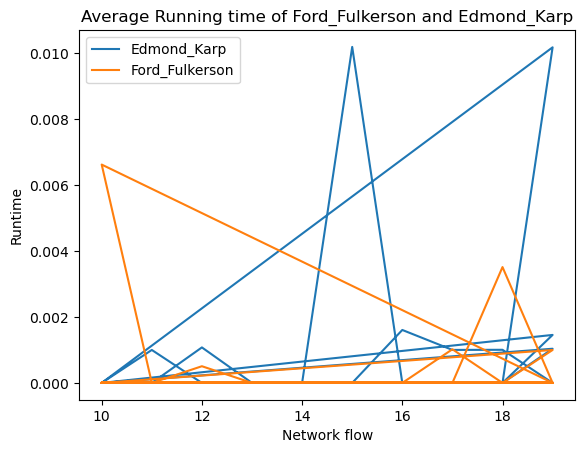

In [25]:
import matplotlib.pyplot as plt
import numpy as np



plt.plot(n_EK, t_EK, label = "Edmond_Karp")                      #plots edmond karp and ford fulkerson
plt.plot(n_FF, t_FF, label = "Ford_Fulkerson")                   #with runtime and maximum flow
plt.title("Average Running time of Ford_Fulkerson and Edmond_Karp")
plt.xlabel("Network flow")
plt.ylabel("Runtime")
plt.legend()
plt.show()


I used the given ford_fulkerson code including the class which happend to be the Edmond_karp algorithm. For the Ford_Fulkerson algorithm, i altered it slightly. I added a visited parameter where the DFS function is called inside Ford_Fulkerson. The DFS function is very similer to the BFS function. I removed all the enqueue and dequeue code and used the first/source node in the array because of DFS. Than i simiply called the DFS function again on the neighbors.

G is the graph of the flow network which is than run on the algorithm. The second algorithm is run shows 0 for flow and time. I called them in two separte code blocks and than this issue didnt come up. I commented out the code where i tried to call them both in the same block. 

The graph does print and both lines are somewhat different from each other. FF has more flat lines while EK is slightly higher. Both have spikes in the graphs but its more common with EK. The time for FF is always 0.0 and EK usually around 0 as well but can have times such as .002 DFS is faster than BFS so output should be correct.